# Rating Prediction Project

#### Data description

We have a client who has a website where people write different reviews for technical products.
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating)
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars,
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the
past and they don’t have a rating. So, we have to build an application which can predict the rating
by seeing the review.

We have collected the data and now we need to build a machine learning model. And before model building we need to perform
all data preprocessing steps involving NLP. Then try different models with different hyper parameters
and select the best model.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_excel("finalreview.xlsx")
df

,Unnamed: 0,Review,Rating
0,0,Everything works with very fast speed due to i...,5
1,1,Good morning.\nIt is a nice product.\nI used i...,5
2,2,Flipkart just took 2 days to deliver the produ...,5
3,3,"Got it 40k,and at that particular price it's j...",5
4,4,It's a best laptop in this price range. I have...,5
...,...,...,...
34379,34379,Good router. Good bandwidth.,5
34380,34380,Most advanced version Modem with many addition...,5
34381,34381,horribly good...!!!,5
34382,34382,👍❤️👍👍super,5


### EDA

In [3]:
df.shape

(34384, 3)

We have a total of 34384 records in the dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'Review', 'Rating'], dtype='object')

We can see that we have an index columns, which we don't need. So lets drop the column.

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Review,Rating
0,Everything works with very fast speed due to i...,5
1,Good morning.\nIt is a nice product.\nI used i...,5
2,Flipkart just took 2 days to deliver the produ...,5
3,"Got it 40k,and at that particular price it's j...",5
4,It's a best laptop in this price range. I have...,5
...,...,...
34379,Good router. Good bandwidth.,5
34380,Most advanced version Modem with many addition...,5
34381,horribly good...!!!,5
34382,👍❤️👍👍super,5


In [6]:
# Checking for missing values.

df.isnull().sum()

Review    261
Rating      0
dtype: int64

Some missing values can be seen in the reviews column. Lets visualize and see.

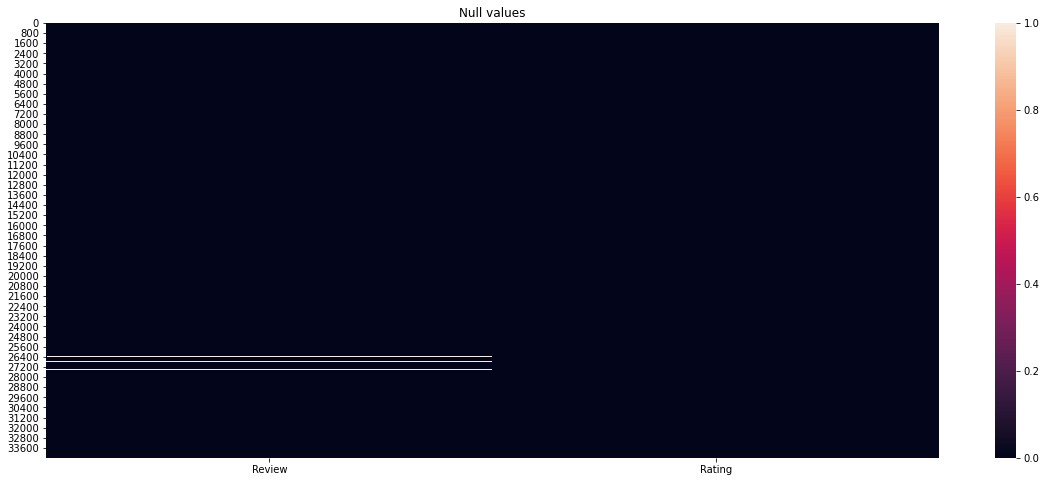

In [7]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

From visualizing also we can see some missing values are present. we need to remove them.

In [8]:
df.dropna(axis=0, inplace=True)
df

,Review,Rating
0,Everything works with very fast speed due to i...,5
1,Good morning.\nIt is a nice product.\nI used i...,5
2,Flipkart just took 2 days to deliver the produ...,5
3,"Got it 40k,and at that particular price it's j...",5
4,It's a best laptop in this price range. I have...,5
...,...,...
34379,Good router. Good bandwidth.,5
34380,Most advanced version Modem with many addition...,5
34381,horribly good...!!!,5
34382,👍❤️👍👍super,5


In [9]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

We can see that the missing values have been removed.

In [10]:
# checking datatypes

df.dtypes

Review    object
Rating     int64
dtype: object

We have the rating as integer and review as object datatype.

In [11]:
print('5 star ratio= ', len(df[df['Rating']==5])/len(df['Rating'])*100,'%')
print('4 star ratio= ', len(df[df['Rating']==4])/len(df['Rating'])*100,'%')
print('3 star ratio= ', len(df[df['Rating']==3])/len(df['Rating'])*100,'%')
print('2 star ratio= ', len(df[df['Rating']==2])/len(df['Rating'])*100,'%')
print('1 star ratio= ', len(df[df['Rating']==1])/len(df['Rating'])*100,'%')

5 star ratio=  32.20408522111186 %
4 star ratio=  20.675204407584328 %
3 star ratio=  15.898367669900068 %
2 star ratio=  13.41617091111567 %
1 star ratio=  17.806171790288076 %


Here we can see the percentage ratio of all the five ratings in the dataset. Lets visualize and see.

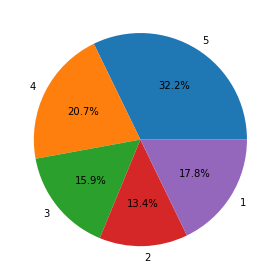

In [12]:
data = [len(df[df['Rating']==5])/len(df['Rating'])*100, len(df[df['Rating']==4])/len(df['Rating'])*100,
       len(df[df['Rating']==3])/len(df['Rating'])*100, len(df[df['Rating']==2])/len(df['Rating'])*100, 
       len(df[df['Rating']==1])/len(df['Rating'])*100]
label= [5,4,3,2,1]

plt.pie(data, labels= label, autopct='%1.1f%%')
plt.tight_layout() 
plt.show()

We can see the visualization of the ratio of the unique ratings in the dataset.

In [13]:
# checking the counts of the rating stars.

df['Rating'].value_counts()

5    10989
4     7055
1     6076
3     5425
2     4578
Name: Rating, dtype: int64

Here we can see that the data contains mostly of the 5 star ratings. Which means that we have a class imbalance in the dataset. We will treat this in further steps.

### Data Cleaning

In [14]:
# new column for review length

df['Length']= df.Review.str.len()
df

,Review,Rating,Length
0,Everything works with very fast speed due to i...,5,300.0
1,Good morning.\nIt is a nice product.\nI used i...,5,332.0
2,Flipkart just took 2 days to deliver the produ...,5,724.0
3,"Got it 40k,and at that particular price it's j...",5,836.0
4,It's a best laptop in this price range. I have...,5,543.0
...,...,...,...
34379,Good router. Good bandwidth.,5,28.0
34380,Most advanced version Modem with many addition...,5,58.0
34381,horribly good...!!!,5,19.0
34382,👍❤️👍👍super,5,10.0


Here we are creating a new column that contains the length of the review section. This will help us campare the length after data cleaning.

In [15]:
# converting all the reviews to lower case.

df['Review']=df['Review'].str.lower()
df

,Review,Rating,Length
0,everything works with very fast speed due to i...,5,300.0
1,good morning.\nit is a nice product.\ni used i...,5,332.0
2,flipkart just took 2 days to deliver the produ...,5,724.0
3,"got it 40k,and at that particular price it's j...",5,836.0
4,it's a best laptop in this price range. i have...,5,543.0
...,...,...,...
34379,good router. good bandwidth.,5,28.0
34380,most advanced version modem with many addition...,5,58.0
34381,horribly good...!!!,5,19.0
34382,👍❤️👍👍super,5,10.0


We can see all the data have been converted to lower case.

In [16]:
# Cleaning the data for unnecessary elements using regular expression.


# replacing email addresses with 'emailaddress'
df['Review']= df['Review'].str.replace(r'[a-zA-Z0-9.-]+@[a-zA-Z0-9-]+\.[\w]+','emailaddress')
    
# replacing urls with 'webaddress'
df['Review']= df['Review'].str.replace(r'(https?://)?(www\.)?(\w+)\.(\w)+','webaddress')
    
# replacing money symbol with string
df['Review']= df['Review'].str.replace(r'\₹|\$','currency')
    
# replacing number with string
df['Review']= df['Review'].str.replace(r'\d+(\.\d+)?','number')

In [17]:
# replacing punctuations with space
df['Review']= df['Review'].str.replace(r'[^\w\d\s]',' ')
    
# replacing whitespace between terms with single space
df['Review']= df['Review'].str.replace(r'\s+',' ')
    
# removing leading and trailing whitespace
df['Review']= df['Review'].str.replace(r'^\s{2,}|\s{2,}$','')

In [18]:
df

,Review,Rating,Length
0,everything works with very fast speed due to i...,5,300.0
1,good morning it is a nice product i used it fo...,5,332.0
2,flipkart just took number days to deliver the ...,5,724.0
3,got it numberk and at that particular price it...,5,836.0
4,it s a best laptop in this price range i have ...,5,543.0
...,...,...,...
34379,good router good bandwidth,5,28.0
34380,most advanced version modem with many addition...,5,58.0
34381,horribly good,5,19.0
34382,super,5,10.0


The dataset has been cleaned for unwanted elements.

In [19]:
df.isnull().sum()

Review    2
Rating    0
Length    2
dtype: int64

Now we can see that we have two empty records. Lets remove them.

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
#removing stopwords

from nltk.corpus import stopwords

exclude_words = set(("didn't","doesn't","don't", "isn't", 'not'))
stop_words= set(stopwords.words('english')+['phone','laptop','monitor','camera','printer','headphone','router','product','number'])
new_stop_words = stop_words - exclude_words

df['Review']= df['Review'].apply(lambda x: ' '.join(j for j in x.split() if j not in new_stop_words))

In [22]:
# new column for clean length

df['Cleaned_length']= df.Review.str.len()
df

,Review,Rating,Length,Cleaned_length
0,everything works fast speed due inumber number...,5,300.0,241
1,good morning nice used day strong muscular wor...,5,332.0,194
2,flipkart took days deliver used hours first im...,5,724.0,467
3,got numberk particular price amazing went onn ...,5,836.0,561
4,best price range bought summer sale rsnumber t...,5,543.0,310
...,...,...,...,...
34379,good good bandwidth,5,28.0,19
34380,advanced version modem many additional features,5,58.0,47
34381,horribly good,5,19.0,13
34382,super,5,10.0,5


Here we have created a new column that contains the length of the review after cleaning the data.

In [23]:
print('original length', df.Length.sum())
print('cleaned length', df.Cleaned_length.sum())

original length 9098416.0
cleaned length 5864636


We can see that the length has decreased significantly after cleaning the data.

### Data Preprocessing

In [24]:
df['Rating'].value_counts()

5    10989
4     7055
1     6074
3     5425
2     4578
Name: Rating, dtype: int64

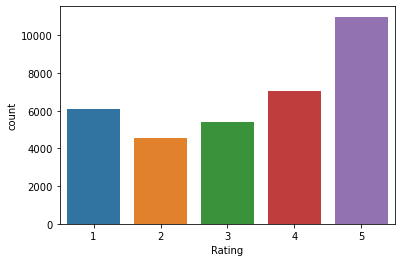

In [25]:
sns.countplot(df['Rating']);

Here we can see that the 5 star rating is significantly more than the other ratings. We need to treat this.

In [26]:
# downsampling the 5 star rating data.

x= df.drop('Rating',axis=1)
y= df.Rating

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [27]:
train= pd.concat([x_train,y_train], axis=1)
test= pd.concat([x_test,y_test], axis=1)

five= train[train.Rating==5]
one= train[train.Rating==1]

In [28]:
from sklearn.utils import resample

down= resample(five, replace=False, n_samples=len(one),random_state=41)

four= train[train.Rating==4]
three= train[train.Rating==3]
two= train[train.Rating==2]

df1= pd.concat([down,one, four, three, two, test])
df1

,Review,Length,Cleaned_length,Rating
20096,good low price,25.0,14,5
1063,amazing performance,19.0,19,5
5155,samsung galaxy snumberplus gnumber gsm factory...,120.0,101,5
13343,months purchase problems started case charges ...,494.0,378,5
32052,not latest greatest model airport extreme not ...,209.0,127,5
...,...,...,...,...
1760,children speed slow,34.0,19,3
1895,grat screen quality gaming nice great features...,100.0,55,4
722,everything inside free trial msi provide dome ...,74.0,56,3
23251,good basic usage print quality not good color ...,387.0,256,3


In the above process, we have first split the data into target and feature and then created the train test split, after that we kept all the unique ratings data into different variables and then we downsampled the 5 star rating data to that of one star data. And finally concatenated all the data together.

In [29]:
df1['Rating'].value_counts()

5    7248
4    7055
1    6074
3    5425
2    4578
Name: Rating, dtype: int64

Now we can see that the dataset is pretty much balanced. Therefore we can proceed now.

### Visualization

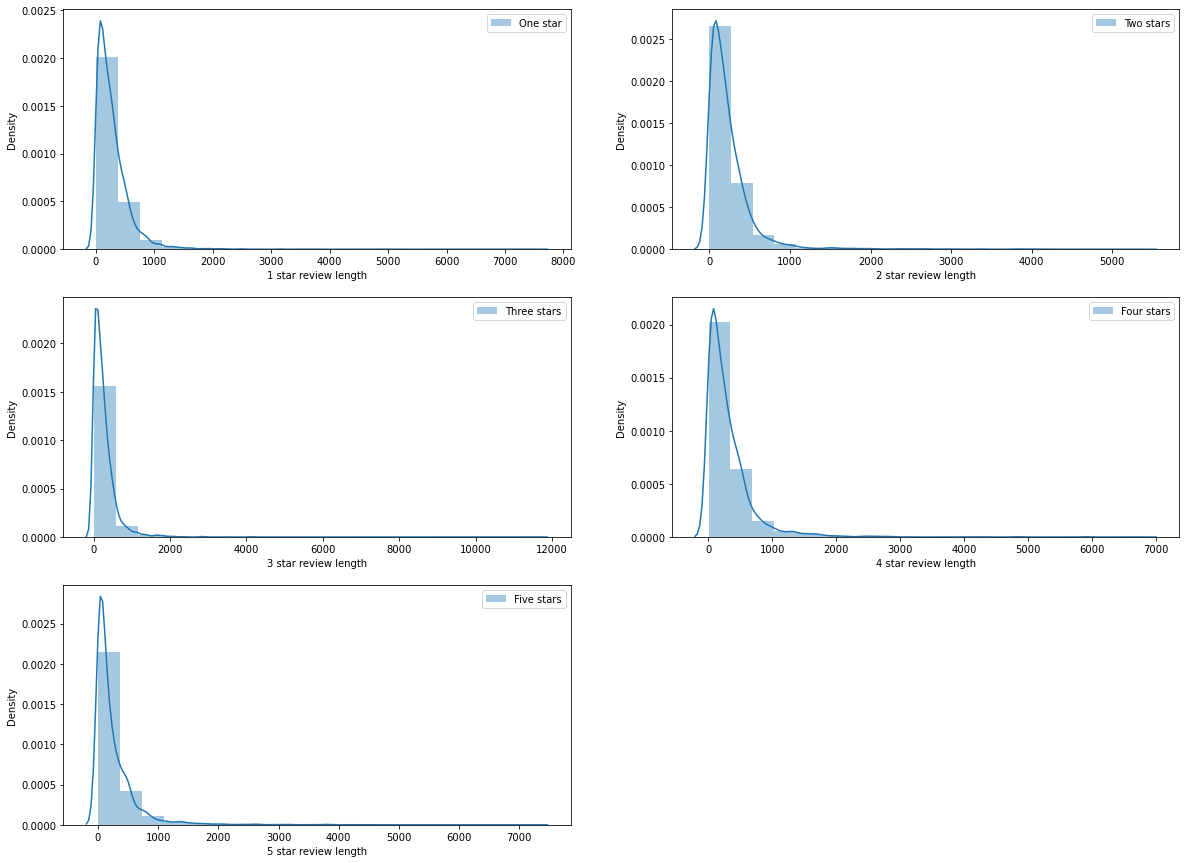

In [30]:
# Checking the distribution before cleaning

fig, axs= plt.subplots(3,2,figsize= (20,15))

sns.distplot(df1[df1['Rating']==1]['Length'], bins=20, ax=axs[0,0], label='One star')
axs[0,0].set_xlabel('1 star review length')
axs[0,0].legend()   

sns.distplot(df1[df1['Rating']==2]['Length'], bins=20, ax=axs[0,1], label='Two stars')
axs[0,1].set_xlabel('2 star review length')
axs[0,1].legend()

sns.distplot(df1[df1['Rating']==3]['Length'], bins=20, ax=axs[1,0], label='Three stars')
axs[1,0].set_xlabel('3 star review length')
axs[1,0].legend()

sns.distplot(df1[df1['Rating']==4]['Length'], bins=20, ax=axs[1,1], label='Four stars')
axs[1,1].set_xlabel('4 star review length')
axs[1,1].legend()

sns.distplot(df1[df1['Rating']==5]['Length'], bins=20, ax=axs[2,0], label='Five stars')
axs[2,0].set_xlabel('5 star review length')
axs[2,0].legend()

axs[2,1].set_axis_off()

plt.show()

We can see that the majority of reviews length is is under 1000. But we can also see some reviews extending very high in length, which shows a high skewness in the length.

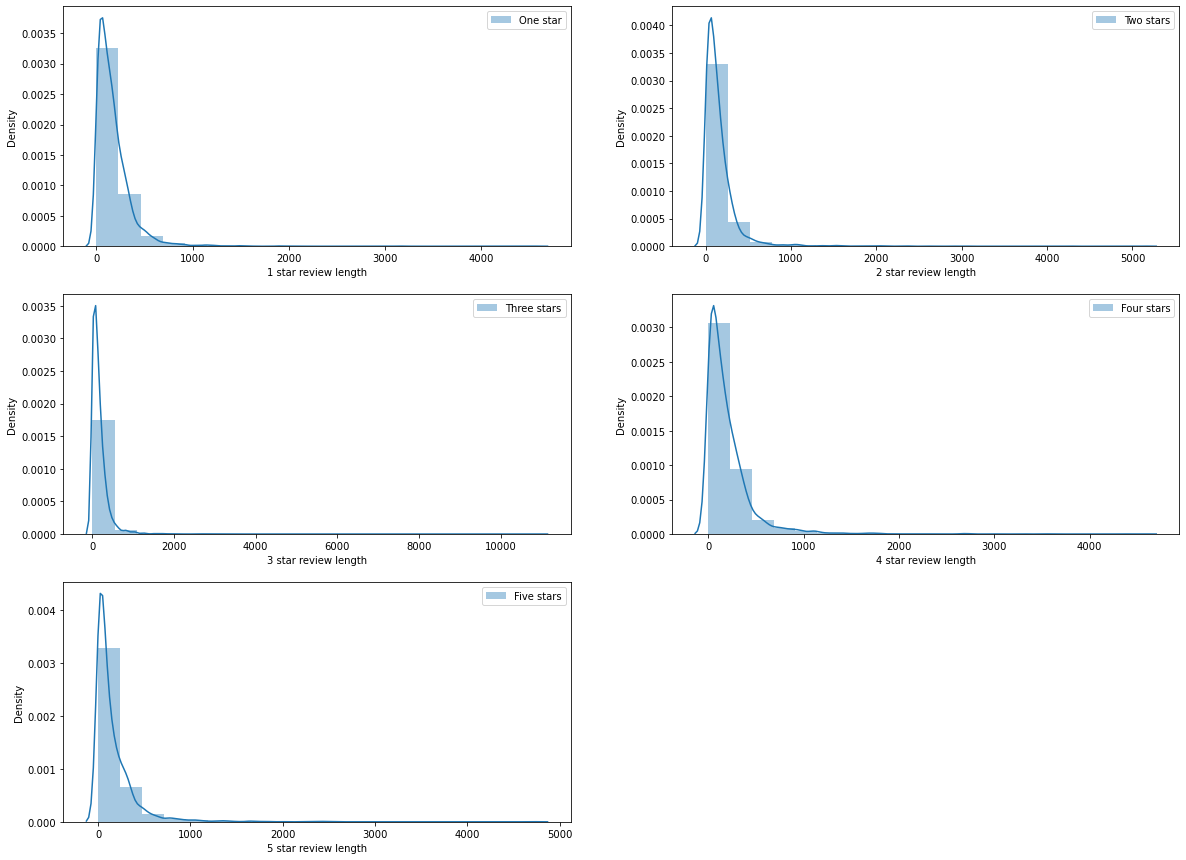

In [31]:
# Checking the distribution after cleaning the data

fig, axs= plt.subplots(3,2,figsize= (20,15))

sns.distplot(df1[df1['Rating']==1]['Cleaned_length'], bins=20, ax=axs[0,0], label='One star')
axs[0,0].set_xlabel('1 star review length')
axs[0,0].legend()   

sns.distplot(df1[df1['Rating']==2]['Cleaned_length'], bins=20, ax=axs[0,1], label='Two stars')
axs[0,1].set_xlabel('2 star review length')
axs[0,1].legend()

sns.distplot(df1[df1['Rating']==3]['Cleaned_length'], bins=20, ax=axs[1,0], label='Three stars')
axs[1,0].set_xlabel('3 star review length')
axs[1,0].legend()

sns.distplot(df1[df1['Rating']==4]['Cleaned_length'], bins=20, ax=axs[1,1], label='Four stars')
axs[1,1].set_xlabel('4 star review length')
axs[1,1].legend()

sns.distplot(df1[df1['Rating']==5]['Cleaned_length'], bins=20, ax=axs[2,0], label='Five stars')
axs[2,0].set_xlabel('5 star review length')
axs[2,0].legend()

axs[2,1].set_axis_off()

plt.show()

Here in this visualization, we can see that the skewness of all the unique ratings data have comparatively been reduced after cleaning the data.

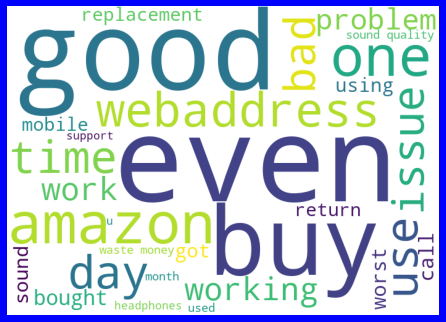

In [32]:
# Creating word clouds

from wordcloud import WordCloud

one= df1['Review'][df1['Rating']==1]

one_cloud= WordCloud(width=700,height=500,background_color= 'white', max_words=30).generate(' '.join(one))

plt.figure(figsize=(6,8), facecolor='b')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the word cloud for 1 star ratings, we can see the words like bad, issue, problem, worst being highlighted.

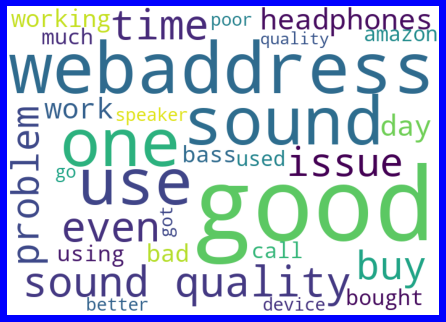

In [33]:
two= df1['Review'][df1['Rating']==2]

two_cloud= WordCloud(width=700,height=500,background_color= 'white', max_words=30).generate(' '.join(two))

plt.figure(figsize=(6,8), facecolor='b')
plt.imshow(two_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the 2 star review word cloud, we can see words like bad, issue, poor being highlighted.

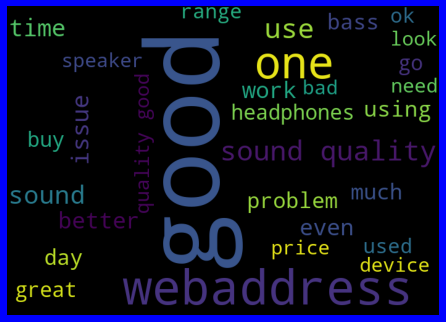

In [34]:
three= df1['Review'][df1['Rating']==3]

three_cloud= WordCloud(width=700,height=500,background_color= 'black', max_words=30).generate(' '.join(three))

plt.figure(figsize=(6,8), facecolor='b')
plt.imshow(three_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see the words better, problem, issue, quality, good being highlighted in the 3 star reviews.

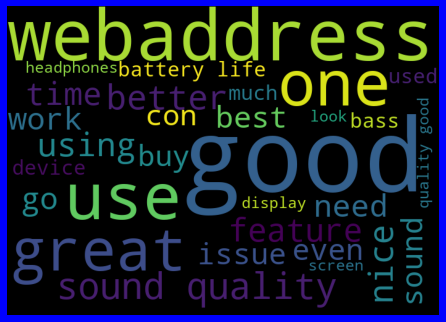

In [35]:
four= df1['Review'][df1['Rating']==4]

four_cloud= WordCloud(width=700,height=500, max_words=30).generate(' '.join(four))

plt.figure(figsize=(6,8), facecolor='b')
plt.imshow(four_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the 4 star reviews we have words like good, great, better, quality good being shown in the word cloud.

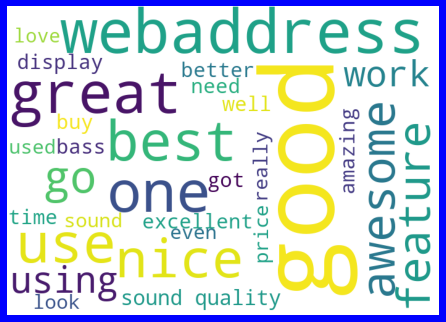

In [36]:
five= df1['Review'][df1['Rating']==5]

five_cloud= WordCloud(width=700,height=500,background_color= 'white', max_words=30).generate(' '.join(five))

plt.figure(figsize=(6,8), facecolor='b')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here in the 5 star reviews, we have the words like good, best, excellent, great being highlighted.

We can see the word 'good' being highlighted in every word cloud, this can be true for 3 to 5 star reviews, but for 1 and 2 star reviews it most probably has a 'not' or a negative word before it. As it may effect our model negatively, lets remove the word.

In [37]:
df1['Review']= df1['Review'].apply(lambda x: ' '.join(j for j in x.split() if j != 'good'))

### Model Building

In [38]:
# convert text into vectors using tf-idf vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec= TfidfVectorizer()

x= tf_vec.fit_transform(df1['Review'])
y= df1['Rating']

In [43]:
# Finding best random state

from sklearn.naive_bayes import MultinomialNB

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    mnb= MultinomialNB()
    mnb.fit(x_train,y_train)
    predmnb= mnb.predict(x_test)
    scr= accuracy_score(y_test,predmnb)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.49848584595128376 on random state 36


In [44]:
# Creating train and test split using the above random state.

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=36)

In [45]:
# Model creation

from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
pred_mnb= mnb.predict(x_test)

print(accuracy_score(y_test,pred_mnb),'\n')
print(confusion_matrix(y_test,pred_mnb),'\n')
print(classification_report(y_test,pred_mnb),'\n')

0.49848584595128376 

[[1170    9   58  251   56]
 [ 489   49  157  374   59]
 [ 257   22  242  635  134]
 [ 134   13   58 1126  479]
 [  38    2   13  571 1199]] 

              precision    recall  f1-score   support

           1       0.56      0.76      0.64      1544
           2       0.52      0.04      0.08      1128
           3       0.46      0.19      0.27      1290
           4       0.38      0.62      0.47      1810
           5       0.62      0.66      0.64      1823

    accuracy                           0.50      7595
   macro avg       0.51      0.45      0.42      7595
weighted avg       0.51      0.50      0.45      7595
 



In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc= dtc.predict(x_test)

print(accuracy_score(y_test,pred_dtc),'\n')
print(confusion_matrix(y_test,pred_dtc),'\n')
print(classification_report(y_test,pred_dtc),'\n')

0.5285055957867018 

[[ 937  218  202   97   90]
 [ 230  499  186  124   89]
 [ 188  158  591  177  176]
 [ 137  116  221  822  514]
 [  82   77  149  350 1165]] 

              precision    recall  f1-score   support

           1       0.60      0.61      0.60      1544
           2       0.47      0.44      0.45      1128
           3       0.44      0.46      0.45      1290
           4       0.52      0.45      0.49      1810
           5       0.57      0.64      0.60      1823

    accuracy                           0.53      7595
   macro avg       0.52      0.52      0.52      7595
weighted avg       0.53      0.53      0.53      7595
 



In [47]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)

print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.5953917050691244 

[[1233   99   88   53   71]
 [ 350  453  166   85   74]
 [ 206  132  575  224  153]
 [ 130   56  140  899  585]
 [  60   20   53  328 1362]] 

              precision    recall  f1-score   support

           1       0.62      0.80      0.70      1544
           2       0.60      0.40      0.48      1128
           3       0.56      0.45      0.50      1290
           4       0.57      0.50      0.53      1810
           5       0.61      0.75      0.67      1823

    accuracy                           0.60      7595
   macro avg       0.59      0.58      0.58      7595
weighted avg       0.59      0.60      0.58      7595
 



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)

print(accuracy_score(y_test,predknn),'\n')
print(confusion_matrix(y_test,predknn),'\n')
print(classification_report(y_test,predknn),'\n')

0.3377221856484529 

[[233  73 237 476 525]
 [ 67 181 191 342 347]
 [ 44  53 452 366 375]
 [ 25  38 354 773 620]
 [ 16  34 274 573 926]] 

              precision    recall  f1-score   support

           1       0.61      0.15      0.24      1544
           2       0.48      0.16      0.24      1128
           3       0.30      0.35      0.32      1290
           4       0.31      0.43      0.36      1810
           5       0.33      0.51      0.40      1823

    accuracy                           0.34      7595
   macro avg       0.40      0.32      0.31      7595
weighted avg       0.40      0.34      0.32      7595
 



In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gdb= GradientBoostingClassifier()
gdb.fit(x_train,y_train)
predgdb= gdb.predict(x_test)

print(accuracy_score(y_test,predgdb),'\n') 
print(confusion_matrix(y_test,predgdb),'\n')
print(classification_report(y_test,predgdb))

0.48321263989466756 

[[ 999  135  128   98  184]
 [ 340  234  205  155  194]
 [ 193  143  374  303  277]
 [  96   61  177  775  701]
 [  42   29   59  405 1288]] 

              precision    recall  f1-score   support

           1       0.60      0.65      0.62      1544
           2       0.39      0.21      0.27      1128
           3       0.40      0.29      0.33      1290
           4       0.45      0.43      0.44      1810
           5       0.49      0.71      0.58      1823

    accuracy                           0.48      7595
   macro avg       0.46      0.46      0.45      7595
weighted avg       0.47      0.48      0.47      7595



Here we can see that all the model are performing similarly, but Random forest and Decision tree are showing us the highest accuracy and f1 score. Lets check the cross validation score for all the models to find if there is any overfitting or underfitting.

### Model Evaluation

In [50]:
# Checking cross validation score

from sklearn.model_selection import cross_val_score

scr= cross_val_score(mnb,x,y,cv=5)

print('cross validation score for multinomial NB model: ', scr.mean())

cross validation score for multinomial NB model:  0.48729427254772884


In [51]:
scr= cross_val_score(dtc,x,y,cv=5)

print('cross validation score for decision tree classifier model: ', scr.mean())

cross validation score for decision tree classifier model:  0.5316326530612245


In [48]:
scr= cross_val_score(fr,x,y,cv=5)

print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.5973554016848339


In [52]:
scr= cross_val_score(knn,x,y,cv=5)

print('cross validation score for K neighbours classifier model: ', scr.mean())

cross validation score for K neighbours classifier model:  0.33508887425938116


In [50]:
scr= cross_val_score(gdb,x,y,cv=5)

print('cross validation score for Gradient boosting classifier model: ', scr.mean())

cross validation score for adaboost classifier model:  0.43165882221798946


Here too we have Random forest and Decision tree giving us the best score, and the difference between the accuracy score and cv score is nearly same in all the models. Hence we can use the highest scoring two model. Lets hyperparameter tune both and models scoring the highest and find the best model.

### Finding the best model

In [53]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Random forest model

par1={'criterion':['gini','entropy'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par1,cv=5)
rcvfr.fit(x_train,y_train)
rcvfr.best_params_

{'max_features': 'auto', 'criterion': 'gini'}

In [54]:
# Now we create our model, using the best parameters.

fr_mod= RandomForestClassifier(criterion= 'gini', max_features='auto', random_state=36)
fr_mod.fit(x_train,y_train)
predf1=fr_mod.predict(x_test)
print(accuracy_score(y_test,predf1))
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1),'\n')

0.5984200131665569
[[1209   97  106   54   78]
 [ 324  454  185   90   75]
 [ 213  106  599  211  161]
 [ 114   55  158  903  580]
 [  52   22   52  317 1380]] 

              precision    recall  f1-score   support

           1       0.63      0.78      0.70      1544
           2       0.62      0.40      0.49      1128
           3       0.54      0.46      0.50      1290
           4       0.57      0.50      0.53      1810
           5       0.61      0.76      0.67      1823

    accuracy                           0.60      7595
   macro avg       0.60      0.58      0.58      7595
weighted avg       0.60      0.60      0.59      7595
 



The Random forest model is giving us an accuracy score of 60% and a good f1 scores for all the target values.

In [55]:
# Decision tree model

par2={'criterion' : ["gini", "entropy"], 'splitter' : ["best", "random"]}

rcvdtc= RandomizedSearchCV(dtc,par2,cv=5)
rcvdtc.fit(x_train,y_train)
rcvdtc.best_params_

{'splitter': 'random', 'criterion': 'entropy'}

In [56]:
# Now using the above parameter which is found to be best, we create our model.

dtc_mod= DecisionTreeClassifier(criterion= 'entropy',splitter='random', random_state=36)
dtc_mod.fit(x_train,y_train)
predf2=dtc_mod.predict(x_test)

print(accuracy_score(y_test,predf2))
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2),'\n')

0.5244239631336406
[[ 948  197  191  103  105]
 [ 257  484  167  103  117]
 [ 198  145  597  172  178]
 [ 128  113  221  796  552]
 [  94   54  150  367 1158]] 

              precision    recall  f1-score   support

           1       0.58      0.61      0.60      1544
           2       0.49      0.43      0.46      1128
           3       0.45      0.46      0.46      1290
           4       0.52      0.44      0.48      1810
           5       0.55      0.64      0.59      1823

    accuracy                           0.52      7595
   macro avg       0.52      0.52      0.52      7595
weighted avg       0.52      0.52      0.52      7595
 



The decision tree classifier model is giving us an accuracy score of 52% and also a fair f1 scores for all the target values.

Now, By comparing both the model we can say that the Random forest model is performing better than the Decisio tree model as it is giving us a higher accuracy as well as f1 score, Hence we will make the Random forest model our final model and and save it.

### Saving the model

In [57]:
import joblib

joblib.dump(fr_mod,'rating_nlp.pkl')

['rating_nlp.pkl']